# Zadanie domowe -- interpolacja dwusześcienna

Interpolacja dwusześcienna, to podobnie jak w przypadku interpolacji dwuliniowej, rozszerzenie idei interpolacji jednowymiarowej na dwuwymiarową siatkę.
W trakcie jej obliczania wykorzystywane jest 16 pikseli z otoczenia (dla dwuliniowej 4).
Skutkuje to zwykle lepszymi wynikami - obraz wyjściowy jest bardziej gładki i z mniejszą liczbą artefaktów.
Ceną jest znaczny wzrost złożoności obliczeniowej (zostało to zaobserwowane podczas ćwiczenia).

Interpolacja dana jest wzorem:
\begin{equation}
I(i,j) = \sum_{i=0}^{3} \sum_{j=0}^{3} a_{ij} x^i y^j
\end{equation}

Zadanie sprowadza się zatem do wyznaczenia 16 współczynników $a_{ij}$.
W tym celu wykorzystuje się, oprócz wartość w~puntach $A$ (0,0), $B$ (1 0), $C$ (1,1), $D$ (0,1) (por. rysunek dotyczący interpolacji dwuliniowej), także pochodne cząstkowe $A_x$, $A_y$, $A_{xy}$.
Pozwala to rozwiązać układ 16-tu równań.

Jeśli zgrupujemy parametry $a_{ij}$:
\begin{equation}
a = [ a_{00}~a_{10}~a_{20}~a_{30}~a_{01}~a_{11}~a_{21}~a_{31}~a_{02}~a_{12}~a_{22}~a_{32}~a_{03}~a_{13}~a_{23}~a_{33}]
\end{equation}

i przyjmiemy:
\begin{equation}
x = [A~B~D~C~A_x~B_x~D_x~C_x~A_y~B_y~D_y~C_y~A_{xy}~B_{xy}~D_{xy}~C_{xy}]^T
\end{equation}

To zagadnienie można opisać w postaci równania liniowego:
\begin{equation}
Aa = x
\end{equation}
gdzie macierz $A^{-1}$ dana jest wzorem:

\begin{equation}
A^{-1} =
\begin{bmatrix}
1& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0 \\
0&  0&  0&  0&  1&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0 \\
-3&  3&  0&  0& -2& -1&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0 \\
2& -2&  0&  0&  1&  1&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0 \\
0&  0&  0&  0&  0&  0&  0&  0&  1&  0&  0&  0&  0&  0&  0&  0 \\
0&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0&  1&  0&  0&  0 \\
0&  0&  0&  0&  0&  0&  0&  0& -3&  3&  0&  0& -2& -1&  0&  0 \\
0&  0&  0&  0&  0&  0&  0&  0&  2& -2&  0&  0&  1&  1&  0&  0 \\
-3&  0&  3&  0&  0&  0&  0&  0& -2&  0& -1&  0&  0&  0&  0&  0 \\
0&  0&  0&  0& -3&  0&  3&  0&  0&  0&  0&  0& -2&  0& -1&  0 \\
9& -9& -9&  9&  6&  3& -6& -3&  6& -6&  3& -3&  4&  2&  2&  1 \\
-6&  6&  6& -6& -3& -3&  3&  3& -4&  4& -2&  2& -2& -2& -1& -1 \\
2&  0& -2&  0&  0&  0&  0&  0&  1&  0&  1&  0&  0&  0&  0&  0 \\
0&  0&  0&  0&  2&  0& -2&  0&  0&  0&  0&  0&  1&  0&  1&  0 \\
-6&  6&  6& -6& -4& -2&  4&  2& -3&  3& -3&  3& -2& -1& -2& -1 \\
4& -4& -4&  4&  2&  2& -2& -2&  2& -2&  2& -2&  1&  1&  1&  1 \\
\end{bmatrix}
\end{equation}

Potrzebne w rozważaniach pochodne cząstkowe obliczane są wg. następującego przybliżenia (przykład dla punktu A):
\begin{equation}
A_x = \frac{I(i+1,j) - I(i-1,j)}{2}
\end{equation}
\begin{equation}
A_y = \frac{I(i,j+1) - I(i,j-1)}{2}
\end{equation}
\begin{equation}
A_xy = \frac{I(i+1,j+1) - I(i-1,j) - I(i,j-1) + I(i,j)}{4}
\end{equation}

## Zadanie

Wykorzystując podane informacje zaimplementuj interpolację dwusześcienną.
Uwagi:
- macierz $A^{-1}$ dostępna jest w pliku *a_invert.py*
- trzeba się zastanowić nad potencjalnym wykraczaniem poza zakres obrazka (jak zwykle).

Ponadto dokonaj porównania liczby operacji arytmetycznych i dostępów do pamięci koniecznych przy realizacji obu metod interpolacji: dwuliniowej i dwusześciennej.

In [3]:
import cv2
import os
from matplotlib import pyplot as plt
import numpy as np

if not os.path.exists("ainvert.py") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/05_Resolution/ainvert.py --no-check-certificate

from ainvert import *

def dwuszescienna(image, x_scale, y_scale):
    y_size, x_size = image.shape
    new_x = int(x_size * x_scale)
    new_y = int(y_size * y_scale)

    new_scale_x = (new_x - 1)/(x_size - 1)
    new_scale_y = (new_y - 1)/(y_size - 1)

    new_image = np.zeros([new_y, new_x], dtype=np.uint8)

    def safe_access_to_image(image_a, i, j):
        y_size_a, x_size_a = image_a.shape
        return int(image_a[np.clip(i, 0, y_size_a-1), np.clip(j, 0, x_size_a-1)])

    def calc_derivatives(image_a, i, j):
        point = safe_access_to_image(image_a, i, j)
        point_y = (safe_access_to_image(image_a, i + 1, j) - safe_access_to_image(image_a, i - 1, j)) / 2
        point_x = (safe_access_to_image(image_a, i, j + 1) - safe_access_to_image(image_a, i, j - 1)) / 2
        point_xy = (safe_access_to_image(image_a, i + 1, j + 1) - safe_access_to_image(image_a, i - 1, j)
                    - safe_access_to_image(image_a, i, j - 1) + safe_access_to_image(image_a, i, j)) / 4

        return point, point_y, point_x, point_xy

    for i in range(new_y):
        for j in range(new_x):

            i_w=i/new_scale_y
            j_w=j/new_scale_x

            i1 = int(np.floor(i_w))
            i2 = i1 + 1
            j1 = int(np.floor(j_w))
            j2 = j1 + 1

            A, A_x, A_y, A_xy = calc_derivatives(image, i1, j1)
            B, B_x, B_y, B_xy = calc_derivatives(image, i1, j2)
            C, C_x, C_y, C_xy = calc_derivatives(image, i2, j2)
            D, D_x, D_y, D_xy = calc_derivatives(image, i2, j1)

            x = np.array([A, B, C, D, A_x, B_x, C_x, D_x, A_y, B_y, C_y, D_y, A_xy, B_xy, C_xy, D_xy])

            a = np.dot(A_invert, x)
            a = np.reshape(a, (4, 4))

            di = i_w - i1
            dj = j_w - j1

            X = np.array([1, dj, dj**2, dj**3])
            Y = np.array([1, di, di**2, di**3])

            new_image[i, j] = np.clip(Y @ a @ X.T, 0, 255).astype(np.uint8)

    return new_image

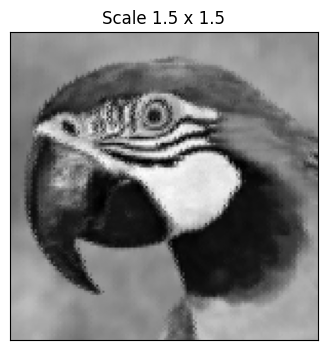

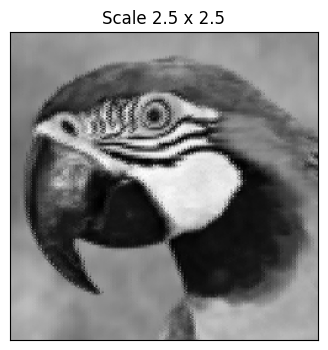

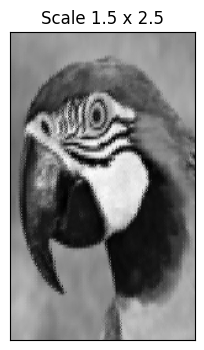

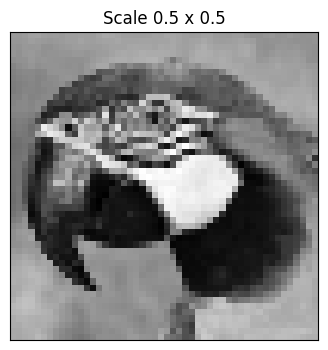

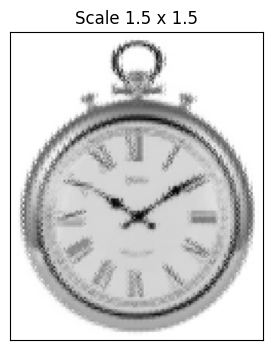

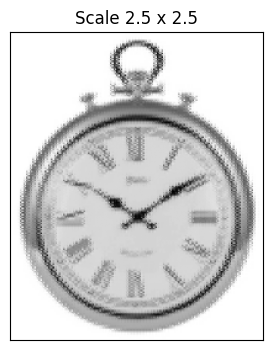

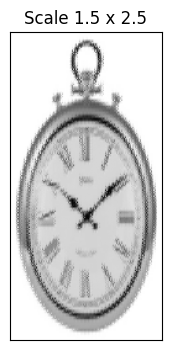

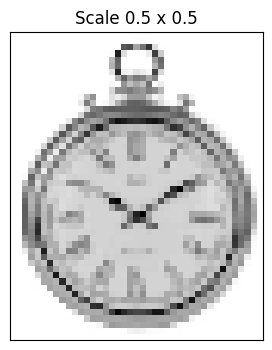

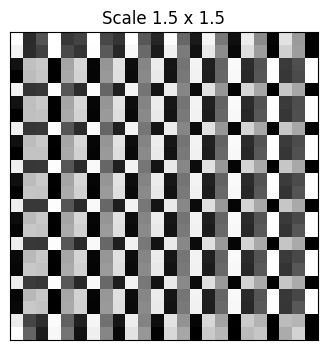

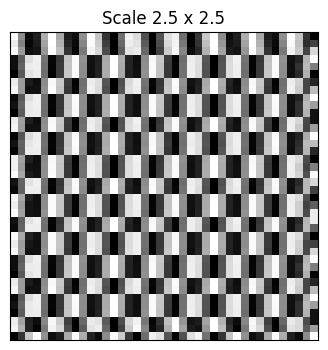

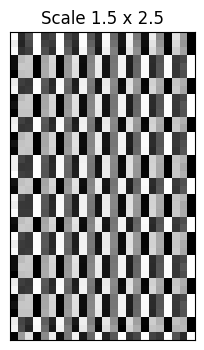

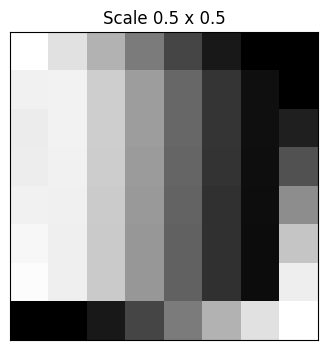

In [4]:
parrot = cv2.imread('parrot.bmp', cv2.IMREAD_GRAYSCALE)
clock = cv2.imread('clock.bmp', cv2.IMREAD_GRAYSCALE)
chessboard = cv2.imread('chessboard.bmp', cv2.IMREAD_GRAYSCALE)

images = [parrot, clock, chessboard]
scales = [[1.5, 1.5],
          [2.5, 2.5],
          [1.5, 2.5],
          [0.5, 0.5]]

for I in images:
    for scale in scales :
        scaled = dwuszescienna(I, x_scale=scale[0], y_scale=scale[1])

        plt.figure(figsize=(4, 4))
        plt.imshow(scaled, cmap ="gray")
        plt.xticks([]), plt.yticks([])  # Hides the graph ticks and x / y axis
        plt.title(f"Scale {scale[0]} x {scale[1]}")
        plt.show()